In [1]:
# Student Name: David de Andres Hernandez
# Matriculation Number: 3755457

# Discrete Event Simulator (DES) - Part 3

# Verification

In [2]:
import part3_simstudy as p3

### Task 3.2.1: Verification of distributions

*Create two histograms, one for each implemented distributions. Generate a sufficient number of samples by using the classes RNG and/or RNS and choose a reasonable number of bins for your histograms.*

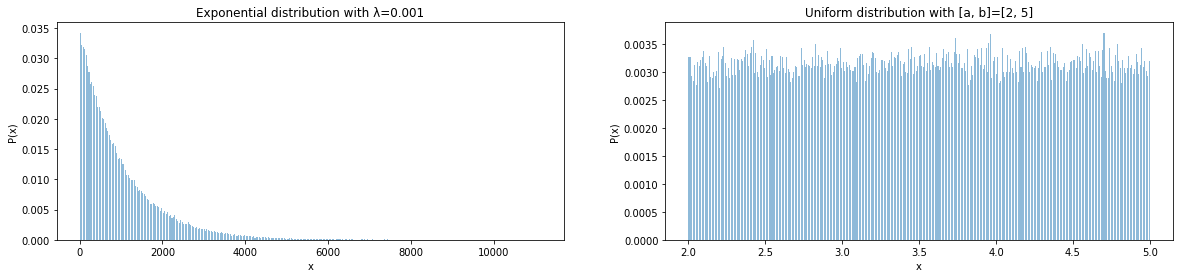

In [3]:
p3.task_3_2_1()

Generated n = 100000 samples for each histogram with bin number = $ceil(\sqrt{i})$


### Task 3.2.2: Verification of system utilization

*Since you are now able to generate exponential distributions, verify your implementation of the system utilization by simulating an $M/M/1/S$ system with a limited queue capacity $(S = 5)$ and $\rho = \frac{\lambda}{\mu} = 0.01, 0.5, 0.8, 0.9$. Simulate your system for 100s and 1000s. Note, that depending on your implementation you may have to reset your simulation object when changing the ρ in the parameter object.*

In [4]:
p3.task_3_2_2()

####### SIM_TIME = 100s #######
Name: sys_util=0.01, Mean: 0.012933733612294919, Variance: 0.012766452147141111
Name: sys_util=0.5, Mean: 0.5018990659822132, Variance: 0.2499963935483952
Name: sys_util=0.8, Mean: 0.7699254583225432, Variance: 0.17714024694936503
Name: sys_util=0.9, Mean: 0.8034558916487677, Variance: 0.1579145218236513
####### SIM_TIME = 1000s #######
Name: sys_util=0.01, Mean: 0.009017269386619089, Variance: 0.008935958239428232
Name: sys_util=0.5, Mean: 0.5204275792609906, Variance: 0.24958271400553594
Name: sys_util=0.8, Mean: 0.7790919587725551, Variance: 0.1721076785484984
Name: sys_util=0.9, Mean: 0.8187006669631778, Variance: 0.14842988487722564


#  Analysis and General Questions

### Task 3.3.1: Seed for Random Number Generation

*Why does it make sense to use a seed when simulating a non-deterministic system?*

Simulating a non-deterministic systems requires a random number generator. Unfortunately,computers cannot generate true random numbers, only real physical phenomena can be used to obtain real random numbers. To overcome this problem, computers rely on pseudorandom number generators. Their generating algorithms requires to be initialised with a seed. This means that the generated sequence is fully determined by the seed. In other words, if the generator is reinitialized with the same seed, it will produce the same sequence of numbers. Fixing the seed, allow simulations to be replicable, which can be useful.

### Task 3.3.2: Bins for Histograms

*How does the shape of the histograms change if you reduce/increase the number of bins? What would be a reasonable number of bins and how does it depend on the number of samples?*

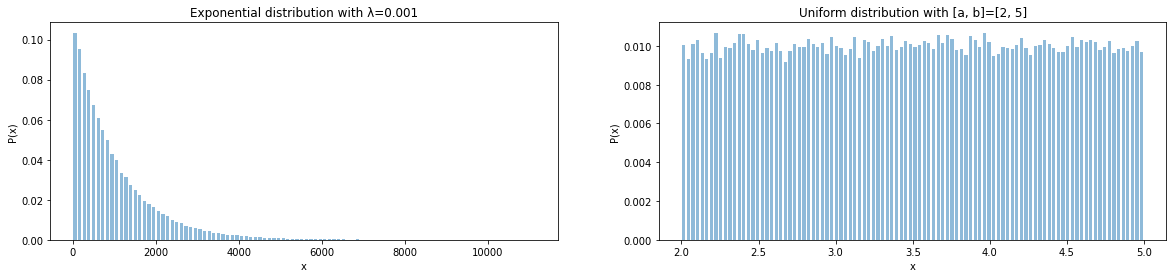

In [5]:
p3.plot_random_distribution_histograms(100)

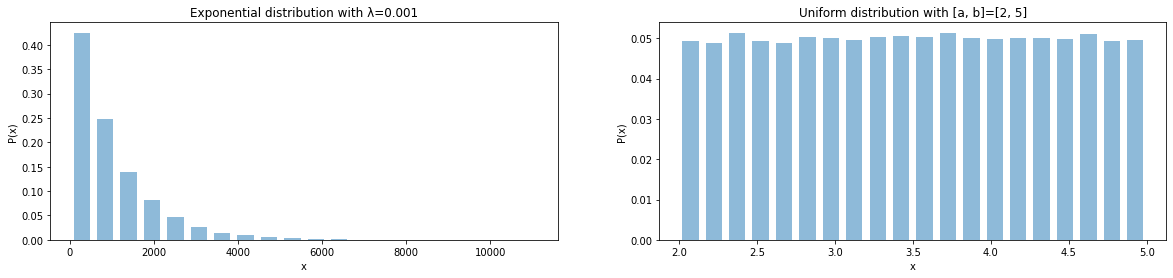

In [6]:
p3.plot_random_distribution_histograms(20)

There is a rule of thumb for choosing the number of bins:
$$ ceil(\sqrt{i})$$
Being i the number of samples.
If we reduce the number of bins, we loose precision. On the contrary, if we increase we approach more and more the shape of the continuous distribution.

### Task 3.3.3: System Utilization Histogram

*Plot the histogram of the system utilization for ρ = 0.01, S = 5 and the simulation duration of 1000s, where each sample of the histogram is an average system utilization of one of 1000 runs (you would have 1000 samples in total). The PDF of which probability distribution can be used to approximate the obtained histogram? Is there a theoretical explanation for that?*

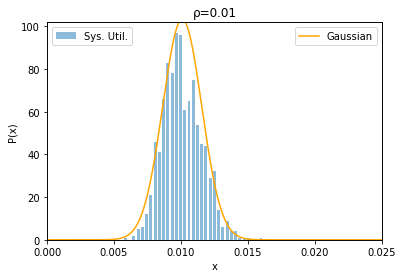

Name: sys_util, Mean: 0.01009007693785612, Variance: 2.1237430075734904e-06


In [7]:
p3.task_3_3_3()

A gaussian with the mean and std. dev as printed above can be used to approximate the histogram. This is due to the central limit theorem. We can see the result in the plot. The orange plot stands for the pdf of a gaussian distribution with the mean and std. dev from the system utilization.

### Task 3.3.4: Expected System Utilization

*How do you interpret the results from task 3.2.2? What is the expected system utilization, if you simulate for an infinite simulation time? What happens, if S becomes unlimited?*

In [8]:
p3.task_3_3_4()

####### S = 1000000 SIM_TIME = 1000s #######
Name: sys_util=0.01, Mean: 0.009329308021263704, Variance: 0.009242272033108088
Name: sys_util=0.5, Mean: 0.5221590921567903, Variance: 0.24950897463478688
Name: sys_util=0.8, Mean: 0.7983944486836532, Variance: 0.16096075299477863
Name: sys_util=0.9, Mean: 0.9726695444710651, Variance: 0.026583501729515735
####### S = 1000000 SIM_TIME = 10000s #######
Name: sys_util=0.01, Mean: 0.010052103178259154, Variance: 0.009951058399952787
Name: sys_util=0.5, Mean: 0.5000712371234638, Variance: 0.24999999492527225
Name: sys_util=0.8, Mean: 0.8091455754956945, Variance: 0.15442901315143587
Name: sys_util=0.9, Mean: 0.8881832853141328, Variance: 0.09931373700272661


The expected utilizations are [.01, .5, .8, .9]. The longer the simulation times the less weight the warm-up (initial) phase has into the mean utilization. If S is unlimited, then the system utilization behaves likes an M/M/1 instead of an M/M/1/S system. In this case, if the utilization is not smaller than one, the queue becomes unbounded.